In [ ]:
import wikipedia
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.parsing.porter import PorterStemmer
from sklearn.cluster import KMeans, kmeans_plusplus
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.colors as mcolors

In [ ]:
def read_docs(file):
    docs = []
    with open(file, "r") as f:
        lines = f.readlines()
        for l in tqdm(lines):
            l = l.strip()
            pid = int(l.split()[0])
            title=' '.join(l.split()[1:])
            try:
                wiki = wikipedia.page(pageid=pid)
            except AttributeError:
                wiki = wikipedia.page(title=title)
                
            docs.append({'id': pid, 'title': title, 'summary': wiki.summary})
    return pd.DataFrame.from_records(docs)

In [ ]:
hubs = "topHubs.txt"
auths = "topAuths.txt"

In [ ]:
hubs_df = read_docs(hubs)

In [ ]:
hubs_df

In [ ]:
auths_df = read_docs(auths)

In [ ]:
auths_df

In [ ]:
model = SentenceTransformer('bert-base-uncased')
features = model.encode(auths_df.summary)

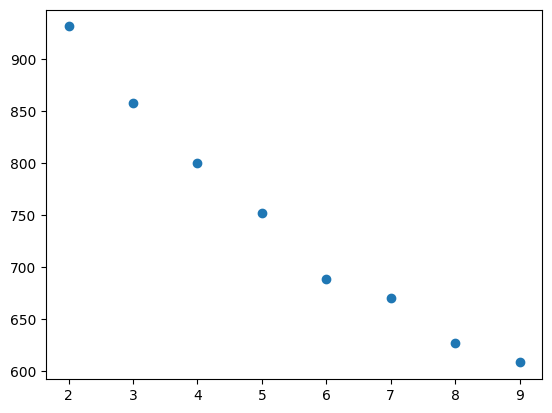

In [119]:
x = []
y = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(features)
    x.append(i)
    y.append(kmeans.inertia_)
plt.scatter(x, y)
plt.show()

In [117]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)
auths_df['cluster'] = kmeans.fit_predict(features)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


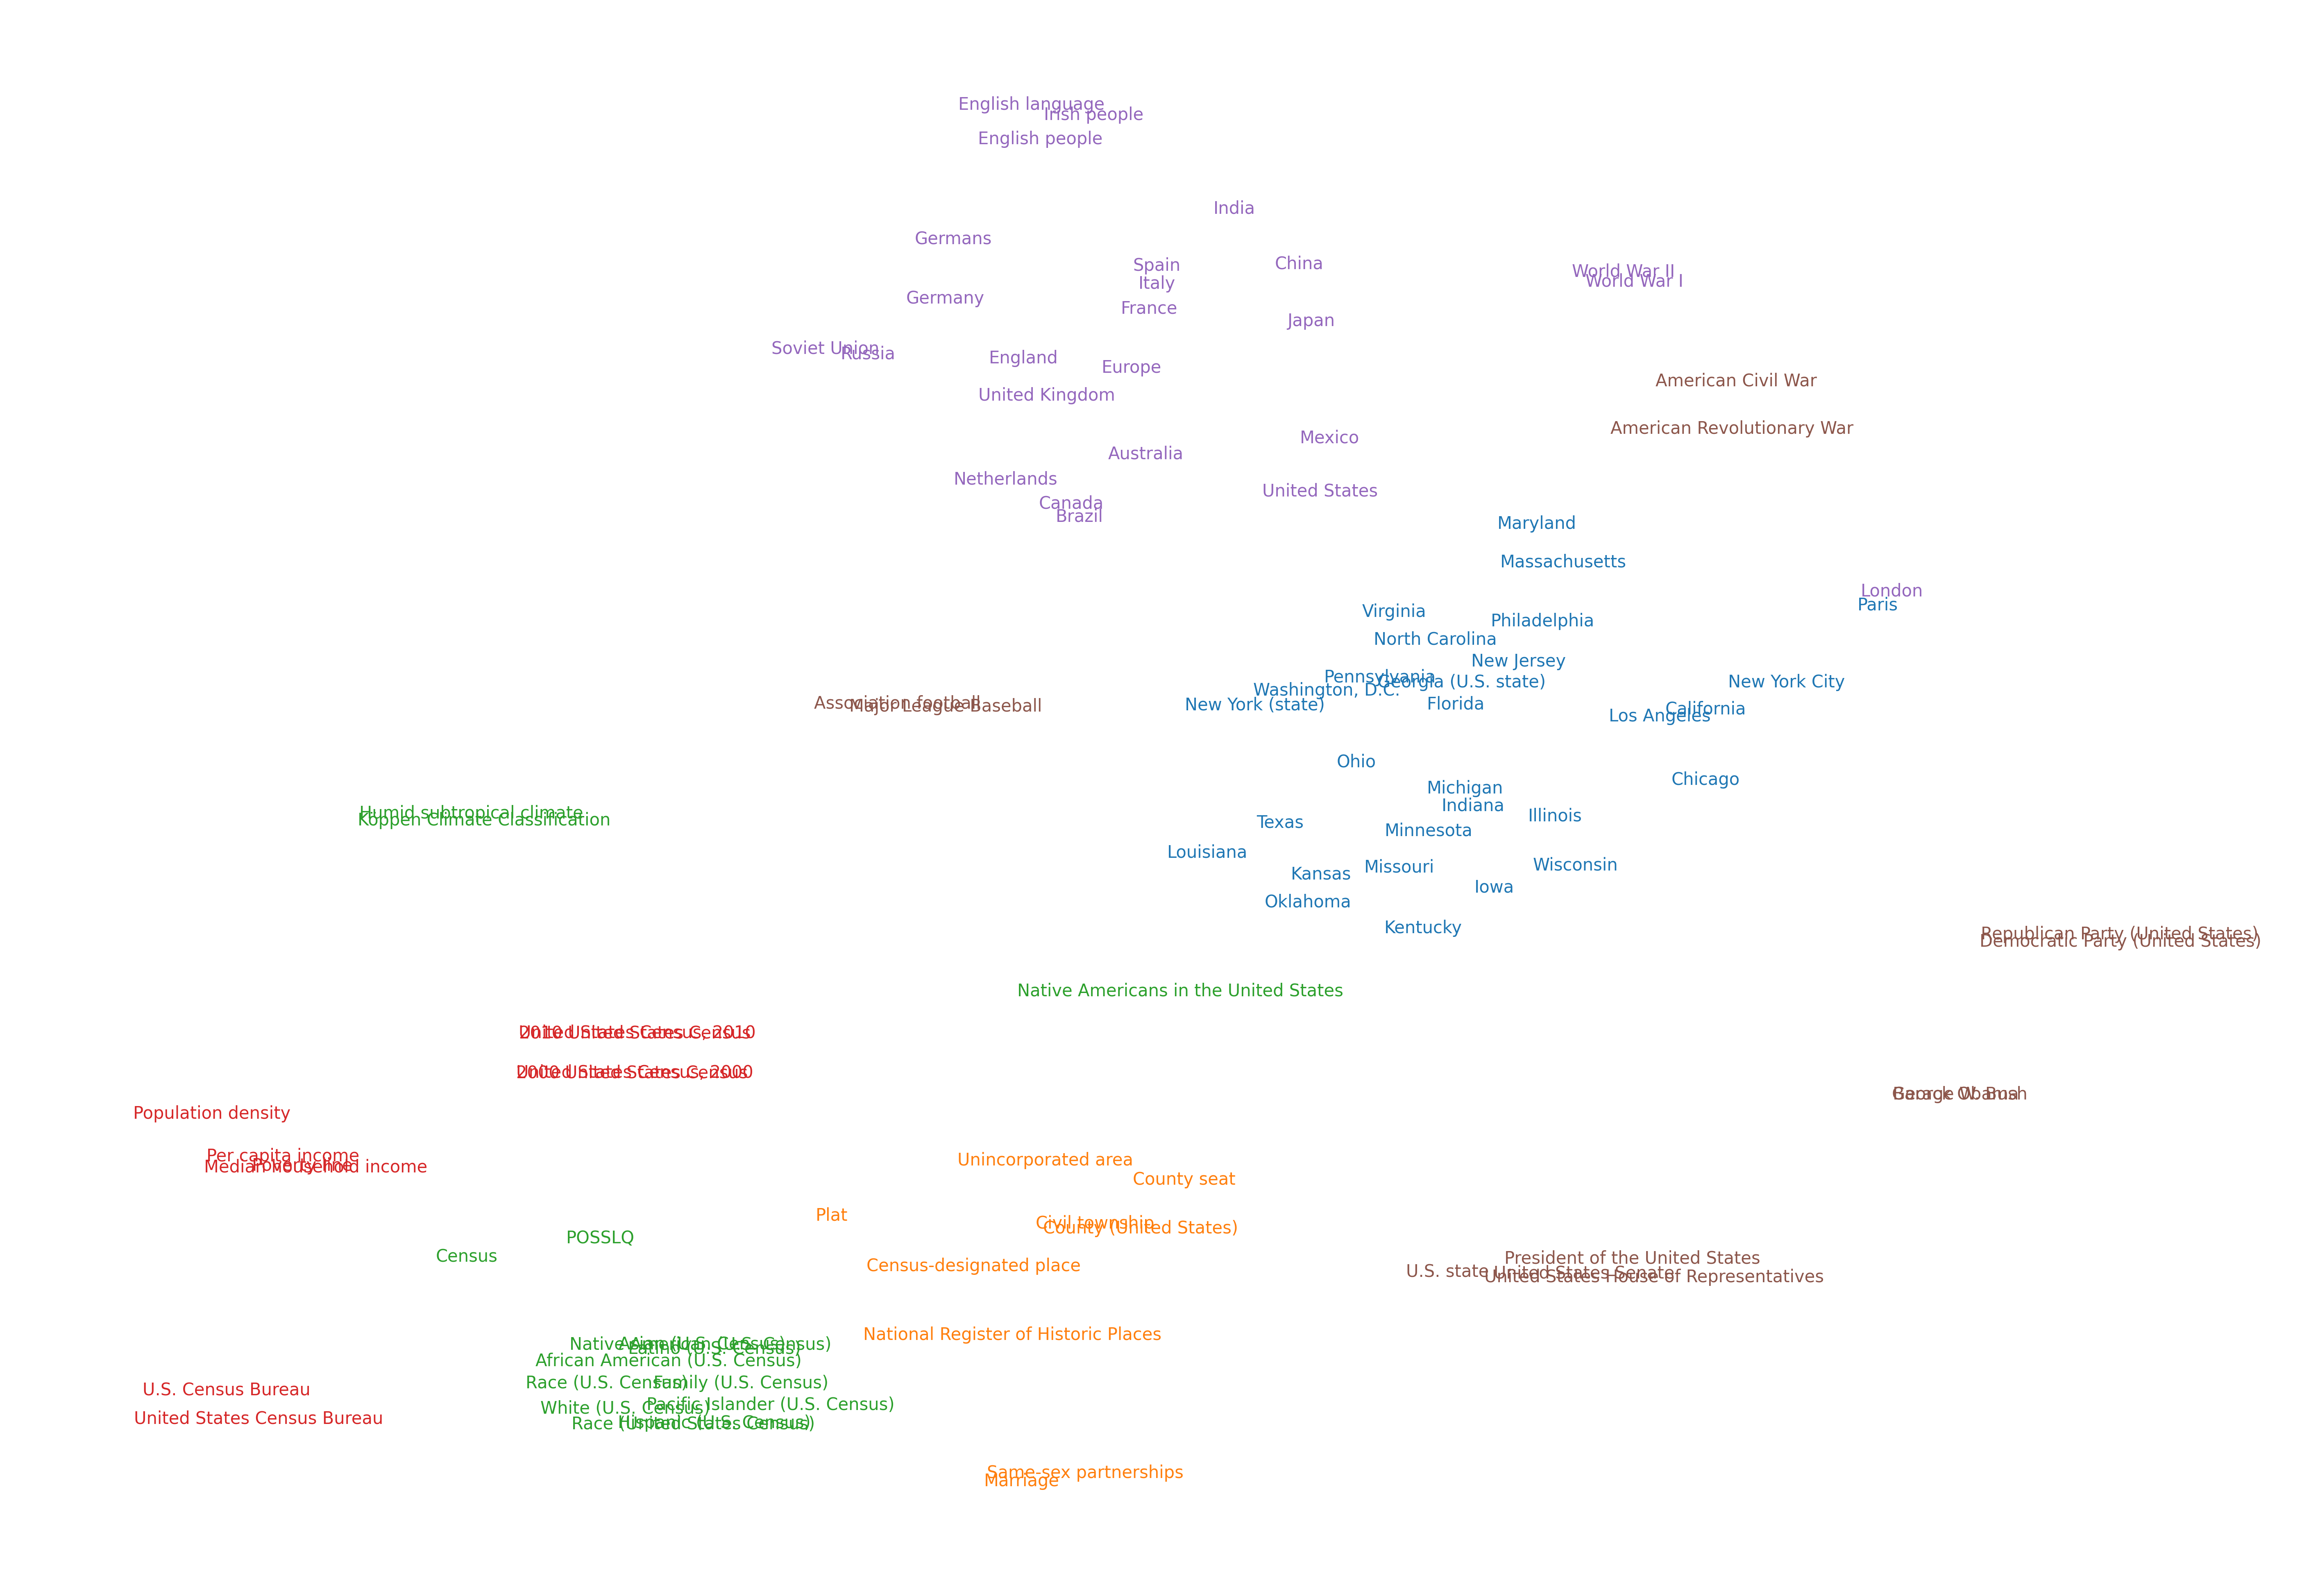

In [128]:
tsne = TSNE()
xy = tsne.fit_transform(features)
fig, ax = plt.subplots()
fig.set_dpi(1000)
colors = list(mcolors.TABLEAU_COLORS.keys())
plt.axis('off')

ax.scatter(xy[:,0], xy[:,1], c='white')
for i in range(100):
    ax.annotate(auths_df.iloc[i].title, (xy[i,0], xy[i,1]), fontsize=3, c=colors[auths_df.iloc[i].cluster])
plt.show()

In [129]:
fig.savefig('clusters.png')